In [1]:
import os
import functools

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tests.metaworld.envs.mujoco.sawyer_xyz.utils import trajectory_summary
from tests.metaworld.envs.mujoco.sawyer_xyz.test_scripted_policies import ALL_ENVS, test_cases_latest_nonoise

sns.set()

In [2]:
def sample_trajectories_from(env, policy, act_noise_pct, iters=100):
    sampled_rewards = []
    sampled_returns = []
    sampled_first_successes = []

    for _ in range(iters):
        s = trajectory_summary(env, policy, act_noise_pct, end_on_success=False)
        sampled_rewards.append(s[1])
        sampled_returns.append(s[2])
        first_success = np.where(s[3])[0]
        first_success = first_success[0] if first_success.size else 0
        sampled_first_successes.append(first_success)
        
        for reward, success in zip(s[1], s[3]):
            if success:
                assert reward == 1.0
        
    
    sampled_rewards = np.vstack(sampled_rewards)
    sampled_returns = np.vstack(sampled_returns)
    sampled_first_successes = np.array(sampled_first_successes)

    return sampled_rewards, sampled_returns, sampled_first_successes


def plot(rewards, returns, first_successes, tag):
    first_success = min(int(first_successes.mean()), rewards.shape[1])
    first_success_rew = rewards.mean(axis=0)[first_success]
    first_success_ret = returns.mean(axis=0)[first_success]
    
    fig, ax = plt.subplots(1, 2, figsize=(6.75, 4))

    reward_df = pd.DataFrame(rewards).melt()
    ax[0] = sns.lineplot(x='variable', y='value', data=reward_df, ax=ax[0], ci=100, lw=.5)
    ax[0].set_xlabel('Time Steps')
    ax[0].set_ylabel('Reward')
    ax[0].set_title('Rewards')
    ax[0].vlines(first_success, ymin=0, ymax=first_success_rew, linestyle='--', color='green')
    ax[0].hlines(first_success_rew, xmin=0, xmax=first_success, linestyle='--', color='green')
#     ax[0].set_yscale('symlog')

    return_df = pd.DataFrame(returns).melt()
    ax[1] = sns.lineplot(x='variable', y='value', data=return_df, ax=ax[1], ci=95, lw=.5)
    ax[1].set_xlabel('Time Steps')
    ax[1].set_ylabel('Return')
    ax[1].set_title('Returns')
    ax[1].vlines(first_success, ymin=0, ymax=first_success_ret, linestyle='--', color='green')
    ax[1].hlines(first_success_ret, xmin=0, xmax=first_success, linestyle='--', color='green')
#     ax[1].set_yscale('symlog')

    plt.subplots_adjust(top=.85)
    fig.suptitle(f'{tag} (n={rewards.shape[0]})')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.show()
    if not os.path.exists('figures'):
        os.mkdir('figures')
    fig.savefig(f'figures/{tag}_rewards_returns.jpg')

/Users/avnishnarayan/anaconda3/envs/metaworld/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/Users/avnishnarayan/rl/metaworld/metaworld/policies/policy.py:41: UserWarning: Constant(s) may be too high. Environments clip response to [-1, 1]
  warnings.warn('Constant(s) may be too high. Environments clip response to [-1, 1]')


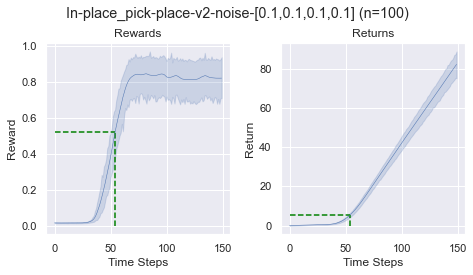

/Users/avnishnarayan/anaconda3/envs/metaworld/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/Users/avnishnarayan/rl/metaworld/metaworld/policies/policy.py:41: UserWarning: Constant(s) may be too high. Environments clip response to [-1, 1]
  warnings.warn('Constant(s) may be too high. Environments clip response to [-1, 1]')


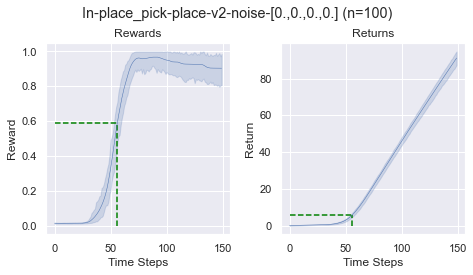

In [3]:
config = [
#     ['button-press-topdown-v1', np.ones(4)],
#     ['pick-place-v2', np.ones(4)*0.5],
#     ['reach-v2', np.ones(4)],
#     ['window-open-v2', np.ones(4)],
#     ['sweep-v1', np.ones(4)],
#     ['sweep-into-v1', np.ones(4)],
#     ['shelf-place-v2', np.ones(4)],
#     ['push-v2', np.ones(4)],
#     ['peg-insert-side-v2', np.ones(4)],
#     ['lever-pull-v2', np.ones(4)],

#     ['button-press-topdown-v1', np.array([1., 1., 1., 0.])],
#     ['pick-place-v2', np.array([1., 1., 1., 0.])],
#     ['reach-v2', np.array([1., 1., 1., 0.])],
#     ['window-open-v2', np.array([1., 1., 1., 0.])],
#     ['sweep-v1', np.array([1., 1., 1., 0.])],
#     ['sweep-into-v1', np.array([1., 1., 1., 0.])],
#     ['shelf-place-v2', np.array([1., 1., 1., 0.])],
#     ['push-v2', np.array([1., 1., 1., 0.])],
#     ['peg-insert-side-v2', np.array([1., 1., 1., 0.])],
#     ['lever-pull-v2', np.array([1., 1., 1., 0.])],

#     ['button-press-topdown-v1', np.full(4, .1)],
    ['pick-place-v2', np.full(4, .1)],
#     ['reach-v2', np.full(4, .1)],
#     ['window-open-v2', np.full(4, .1)],
#     ['sweep-v1', np.full(4, .1)],
#     ['sweep-into-v1', np.full(4, .1)],
#     ['shelf-place-v2', np.full(4, .1)],
#     ['push-v2', np.full(4, .1)],
#     ['peg-insert-side-v2', np.full(4, .1)],
#     ['lever-pull-v2', np.full(4, .1)],

#     ['button-press-topdown-v1', np.zeros(4)],
    ['pick-place-v2', np.zeros(4)],
#     ['reach-v2', np.zeros(4)],
#     ['window-open-v2', np.zeros(4)],
#     ['sweep-v1', np.zeros(4)],
#     ['sweep-into-v1', np.zeros(4)],
#     ['shelf-place-v2', np.zeros(4)],
#     ['push-v2', np.zeros(4)],
#     ['peg-insert-side-v2', np.zeros(4)],
#     ['lever-pull-v2', np.zeros(4)],
]

for env, noise in config:
    tag = 'In-place_' + env + '-noise-' + np.array2string(noise, precision=2, separator=',', suppress_small=True)

    policy = functools.reduce(lambda a,b : a if a[0] == env else b, test_cases_latest_nonoise)[1]
    env = ALL_ENVS[env]()
    env._partially_observable = False
    env._freeze_rand_vec = False
    env._set_task_called = True

    sampled_rewards, sampled_returns, sampled_first_successes = sample_trajectories_from(env, policy, noise)
    plot(sampled_rewards, sampled_returns, sampled_first_successes, tag)

In [4]:
    sampled_first_successes

array([63, 54, 59, 73, 68, 58, 55, 71, 58, 61, 64, 60, 73, 59, 59, 69, 53,
       38, 49,  0,  0, 63, 53, 66, 71, 56, 58, 64, 52, 51, 40, 54, 67, 54,
       76, 55, 71, 58, 69, 35, 55, 53, 69, 57, 47, 58, 61, 58, 55, 58, 49,
       56, 60, 70, 63, 66, 53, 52, 61, 61, 45, 51, 47, 50,  0, 42, 44, 76,
       50, 61, 59, 73, 62, 68, 57, 62, 51, 55, 49, 54, 54, 56, 56, 43, 69,
       64, 60, 56, 64, 57, 63, 46, 53, 90, 64, 75, 51, 65, 68, 63])

In [5]:
np.where(sampled_rewards == 1, sampled_rewards, 0).any()


True

In [6]:
sampled_rewards[6]



array([0.01385502, 0.01365209, 0.01334311, 0.01329717, 0.01334061,
       0.0133811 , 0.0134075 , 0.0134231 , 0.01343199, 0.01343698,
       0.01343977, 0.01344133, 0.01344219, 0.01344267, 0.01344294,
       0.01344309, 0.01344317, 0.01344321, 0.01344324, 0.01344325,
       0.01344326, 0.01344327, 0.01344327, 0.01344327, 0.01359344,
       0.01400891, 0.01457464, 0.01531051, 0.01620361, 0.01721751,
       0.01833901, 0.01954832, 0.02081234, 0.0220862 , 0.02332361,
       0.02449216, 0.02556936, 0.02653666, 0.02778377, 0.02984658,
       0.03293149, 0.0372189 , 0.04298103, 0.05062611, 0.06081539,
       0.0745453 , 0.09312989, 0.11921062, 0.15696345, 0.21302437,
       0.29817943, 0.42653327, 0.60581797, 0.80954508, 0.96110909,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [7]:
for episode in sampled_rewards:
    is_one = False
    for reward in episode:
        if reward == 1.0:
            is_one = True
        if is_one:
            assert reward == 1.0
            

AssertionError: 